# Monte Carlo Option Pricing

This notebook demonstrates how to estimate the price of a European call option using Monte Carlo simulation. It also compares the result to the Black-Scholes analytical price and visualizes the convergence.

**Concept:**
- The price of a European call option can be estimated by simulating many possible future paths of the underlying asset (stock) using Geometric Brownian Motion (GBM).
- For each simulated path, the payoff at maturity is calculated as `max(S(T) - K, 0)`, where `S(T)` is the simulated stock price at maturity and `K` is the strike price.
- The average payoff is discounted back to present value using the risk-free rate.
- The Black-Scholes formula provides an analytical solution for the same option under certain assumptions.

## 1. Import Required Libraries and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the project root directory to the Python path
current_dir = os.getcwd()
if os.path.basename(current_dir) == 'notebooks':
    project_root = os.path.abspath(os.path.join(current_dir, '..'))
else:
    project_root = current_dir
if project_root not in sys.path:
    sys.path.insert(0, project_root)

try:
    from src.monte_carlo.option_pricing import monte_carlo_option_price, black_scholes_call
    print("Successfully imported option pricing functions from src")
except ImportError as e:
    print(f"Error importing option pricing functions: {e}")
    print("Please ensure you are running this notebook from the 'learn_statistics' root directory or the 'notebooks' subdirectory.")

Successfully imported option pricing functions from src


## 2. Set Option and Simulation Parameters

In [2]:
# Option parameters
S0 = 100      # Initial stock price
K = 105       # Strike price
T = 1.0       # Time to maturity (in years)
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
num_steps = 100 # Number of time steps in each path
num_simulations_list = [1000, 5000, 10000, 50000, 100000] # Number of simulation paths

print(f"Parameters: S0={S0}, K={K}, T={T}, r={r}, sigma={sigma}, steps={num_steps}")

Parameters: S0=100, K=105, T=1.0, r=0.05, sigma=0.2, steps=100


## 3. Run Monte Carlo Simulation and Compare to Black-Scholes

In [3]:
mc_prices = []
for num_simulations in num_simulations_list:
    if 'monte_carlo_option_price' in globals():
        mc_price = monte_carlo_option_price(S0, K, T, r, sigma, num_simulations, num_steps)
        mc_prices.append(mc_price)
        print(f"Simulations: {num_simulations:<7} | MC Price: {mc_price:.4f}")
    else:
        print(f"Skipping {num_simulations} simulations, function not imported correctly.")

# Calculate the Black-Scholes price for comparison
if 'black_scholes_call' in globals():
    bs_price = black_scholes_call(S0, K, T, r, sigma)
    print(f"\nBlack-Scholes Price: {bs_price:.4f}")
else:
    bs_price = None
    print("\nCould not calculate Black-Scholes price.")

Simulations: 1000    | MC Price: 8.7131
Simulations: 5000    | MC Price: 8.0567
Simulations: 10000   | MC Price: 8.0032
Simulations: 50000   | MC Price: 7.9677
Simulations: 100000  | MC Price: 7.9665

Black-Scholes Price: 8.0214
Simulations: 100000  | MC Price: 7.9665

Black-Scholes Price: 8.0214


## 4. Visualize Monte Carlo Convergence

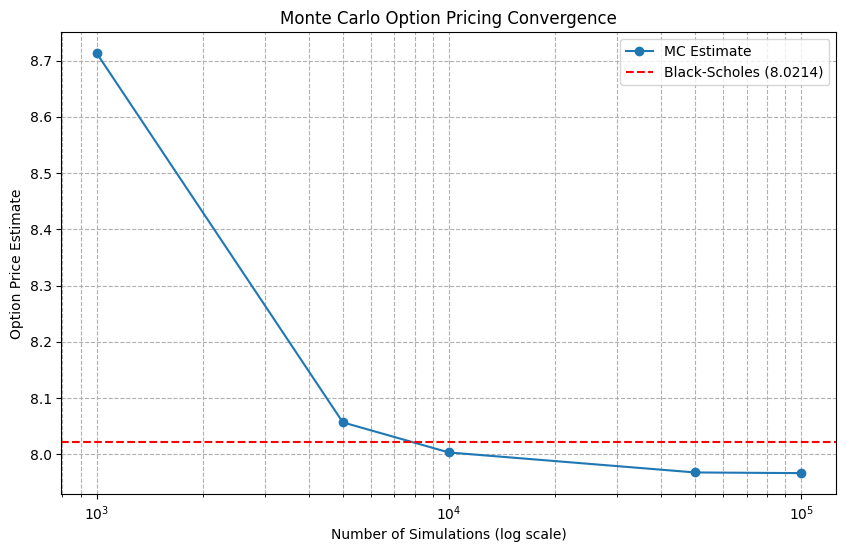

In [4]:
%matplotlib inline
if mc_prices and bs_price is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(num_simulations_list, mc_prices, marker='o', linestyle='-', label='MC Estimate')
    plt.axhline(y=bs_price, color='r', linestyle='--', label=f'Black-Scholes ({bs_price:.4f})')
    plt.xscale('log')
    plt.xlabel('Number of Simulations (log scale)')
    plt.ylabel('Option Price Estimate')
    plt.title('Monte Carlo Option Pricing Convergence')
    plt.legend()
    plt.grid(True, which='both', ls='--')
    plt.show()
else:
    print('Cannot plot results. Ensure MC prices and Black-Scholes price were calculated.')

## 5. Visualize Absolute Error

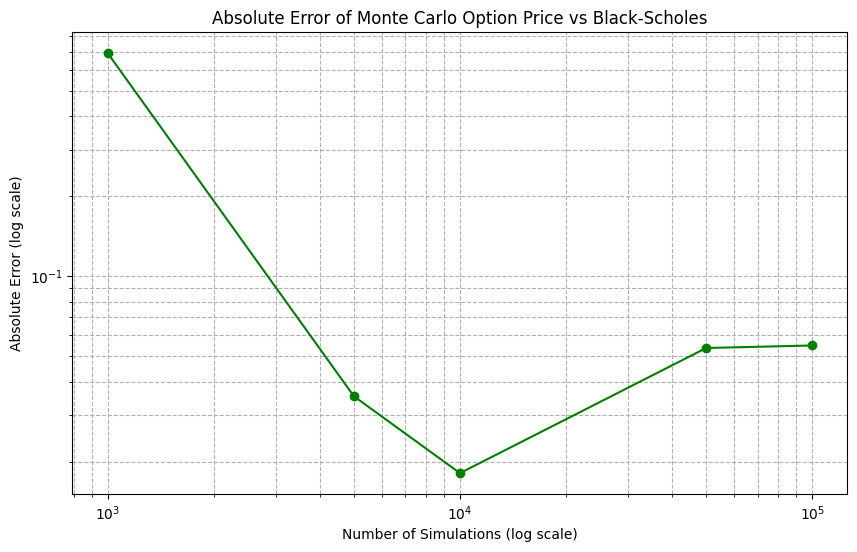

In [5]:
if mc_prices and bs_price is not None:
    abs_errors = [abs(mc - bs_price) for mc in mc_prices]
    plt.figure(figsize=(10, 6))
    plt.plot(num_simulations_list, abs_errors, marker='o', linestyle='-', color='g')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of Simulations (log scale)')
    plt.ylabel('Absolute Error (log scale)')
    plt.title('Absolute Error of Monte Carlo Option Price vs Black-Scholes')
    plt.grid(True, which='both', ls='--')
    plt.show()
else:
    print('Cannot plot error. Ensure MC prices and Black-Scholes price were calculated.')

The plots show that as the number of simulations increases, the Monte Carlo estimate converges to the Black-Scholes price, and the absolute error decreases.